# Laboratory Experiment 007: Blackman Window
# Jayvie Severo BSCpE - 3A
This notebook demonstrates the use of the Blackman window, which provides sharp roll-off and is useful for high-accuracy spectral analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window, welch

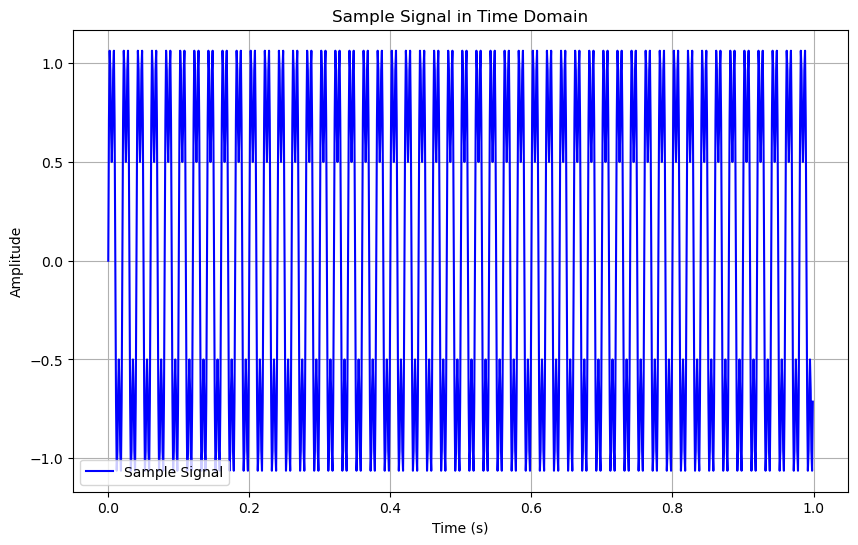

In [2]:
# Generate a Sample Signal
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f1, f2 = 50, 150  # Frequencies of the sine waves (Hz)
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the Sample Signal
plt.figure(figsize=(10, 6))

# Plotting the signal
plt.plot(t, signal, label="Sample Signal", color='blue')

# Adding plot labels and title
plt.title("Sample Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Add legend
plt.legend()

# Display the plot
plt.show()

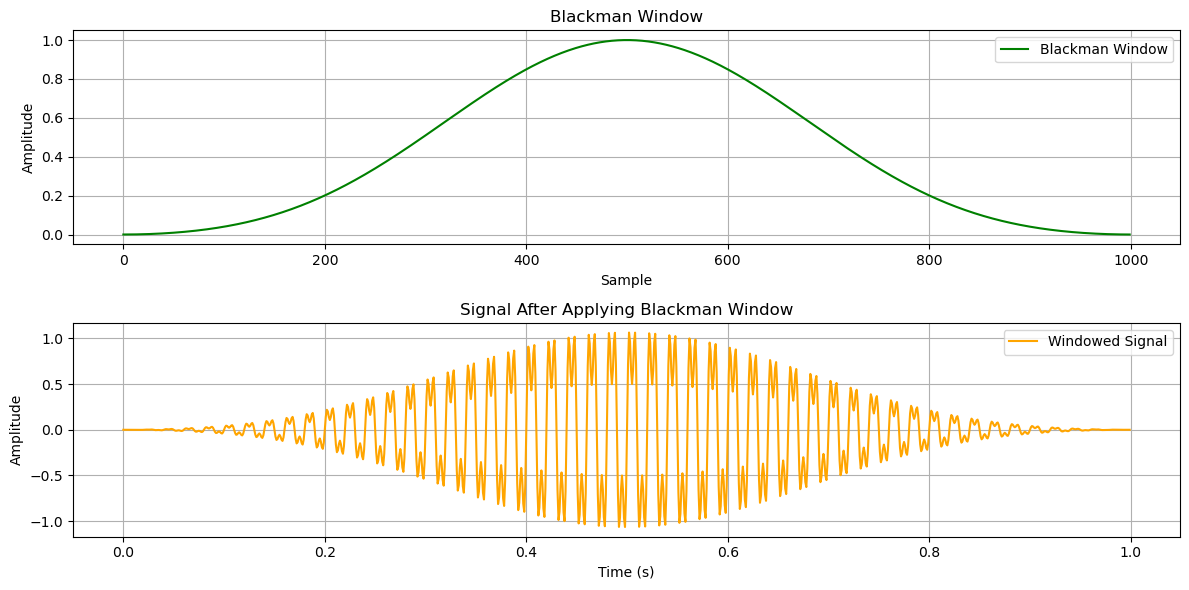

In [3]:
# Apply Blackman Window
blackman_window = get_window('blackman', len(signal))
windowed_signal = signal * blackman_window

# Plot the Blackman Window and the Windowed Signal
plt.figure(figsize=(12, 6))

# Subplot 1: Blackman Window
plt.subplot(2, 1, 1)
plt.plot(blackman_window, label="Blackman Window", color='green')
plt.title("Blackman Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Subplot 2: Windowed Signal
plt.subplot(2, 1, 2)
plt.plot(t, windowed_signal, label="Windowed Signal", color='orange')
plt.title("Signal After Applying Blackman Window")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

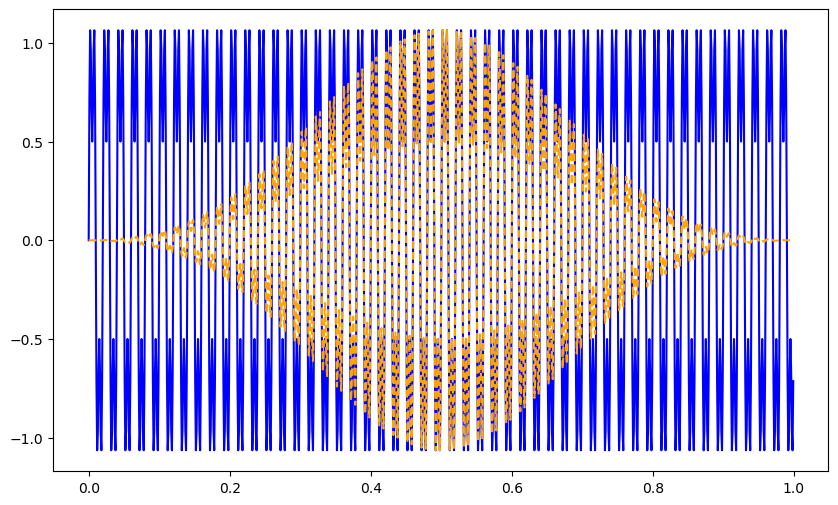

In [4]:
# Plot Original and Windowed Signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Original Signal", color='blue')
plt.plot(t, windowed_signal, label="Windowed Signal", linestyle='--', color='orange')

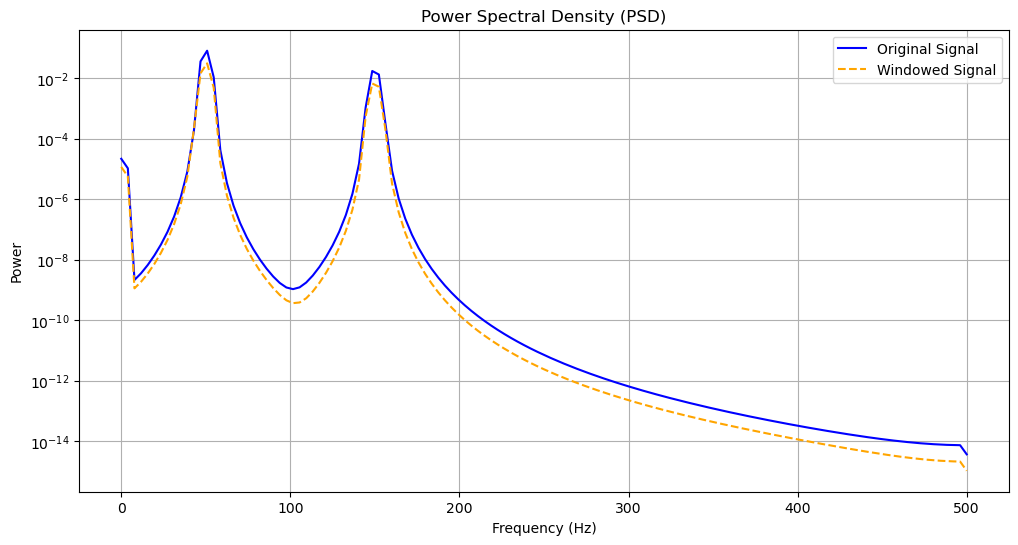

In [5]:
# Compute the Frequency Spectrum
f_original, Pxx_original = welch(signal, fs=fs, nperseg=256)
f_windowed, Pxx_windowed = welch(windowed_signal, fs=fs, nperseg=256)

# Plot the Frequency Spectrum
plt.figure(figsize=(12, 6))

# Original Signal Spectrum
plt.semilogy(f_original, Pxx_original, label="Original Signal", color='blue')

# Windowed Signal Spectrum
plt.semilogy(f_windowed, Pxx_windowed, label="Windowed Signal", color='orange', linestyle='--')

# Customize the Plot
plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()
plt.legend()

# Show the Plot
plt.show()